<a href="https://colab.research.google.com/github/daianeuk/imersao_dados_alura/blob/main/Imersao_dados_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**por Daiane Ucceli**

#**Estudo sobre os dados do ENEM 2019 no estado do Espírito Santo em sua População Feminina:**

Foi usada base de dados do ano passado e feito uma análise sobre a população feminina e alguns aspectos inerentes ao gênero. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ------------- Dados do Estado do Espírito Santo ---------------------------------------------------------------------
fonte = 'https://github.com/cleber-abreu/alura-imersao-dados/blob/main/MICRODADOS_ENEM_2019_ES-csv.zip?raw=true'
# agradecimentos ao Cléber Abreu que disponibilizou o link da BD usada no grupo do Discord. 
#Link usado >>> https://github.com/cleber-abreu/alura-imersao-dados/blob/main/MICRODADOS_ENEM_2019_ES-csv.zip
dados_es = pd.read_csv(fonte, compression="zip") 
mulheres = dados_es.query("TP_SEXO == 'F'")
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados_es["NU_NOTA_TOTAL"] = dados_es[provas].sum(axis=1)


#Distribuição do grupo feminino do ES pela Idade: 

**Observando o gráfico notamos que o grupo com idades entre 16 e 22 anos compõe a grande maioria das participantes.** 

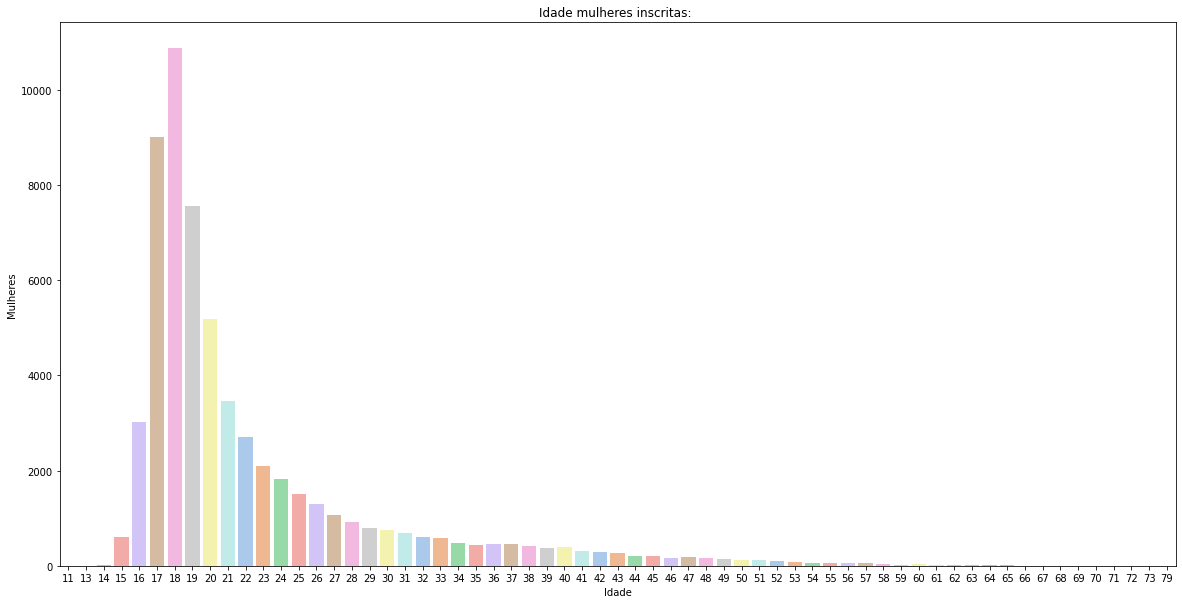

In [ ]:

ax = mulheres["NU_IDADE"].value_counts().index
ay = mulheres["NU_IDADE"].value_counts().values

plt.figure(figsize=(20,10))
sns.barplot(x=ax, y=ay, data = mulheres, palette="pastel")
plt.xlabel("Idade")
plt.ylabel("Mulheres")
plt.title("Idade mulheres inscritas: ")
plt.show()

#Comparativo de idade grupo masculino X feminino: 

---



**Podemos notar aqui que as MULHERES são 59% do total de inscritos no ENEM 2019.** 

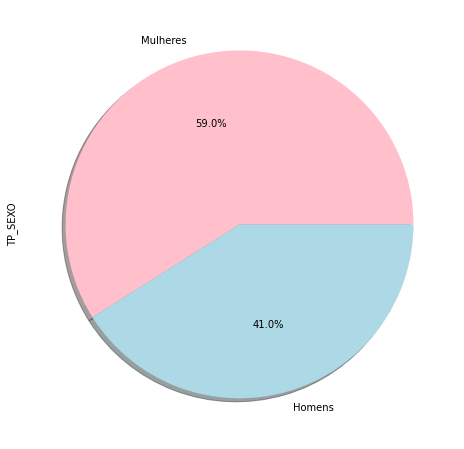

In [ ]:
cores = ["pink", "lightblue"]
df = dados_es.copy()
df["TP_SEXO"] = df["TP_SEXO"].replace({
    'F' : "Mulheres",
    'M' : "Homens"
})
df["TP_SEXO"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(16,8), colors = cores, shadow=True)

#Histograma de idades para Mulheres e Homens:

**Aqui além de visualizarmos melhor a maioria feminica, contata-se que elas também são maioria na faixa de idade entre 16 e 22 anos. Reforçando uma participação feminina jovem.**

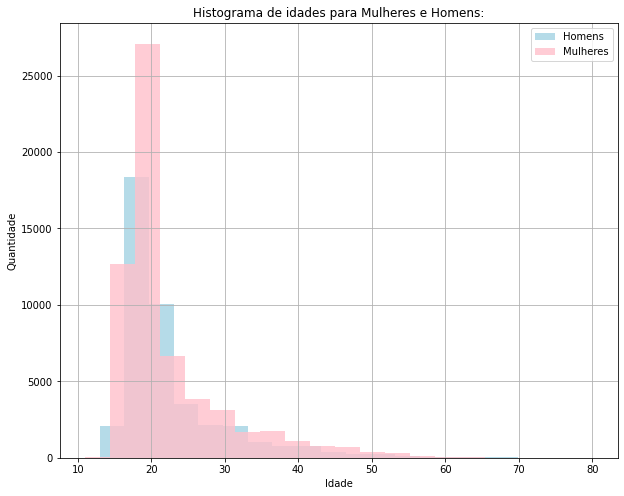

In [ ]:
homens = dados_es.query("TP_SEXO == 'M'")

plt.figure(figsize=(10,8))
homens['NU_IDADE'].hist(bins=20, alpha=0.90, label='Homens', color = "lightblue");
mulheres['NU_IDADE'].hist(bins=20, alpha=0.80, label='Mulheres', color="pink");
plt.xlabel('Idade');
plt.ylabel('Quantidade');
plt.legend();
plt.title('Histograma de idades para Mulheres e Homens:');

#Histograma de idades para candidatos do sexo feminino e masculino que são treineiros:

**Observando os dados em relação aos treineiros, ou seja, aquelas pessoas que fazem a prova com a intenção de testar seu desempenho, notamos uma maioria clara do grupo feminino. Ou seja, meninas mais jovens, com idades entre 13 e 17 anos querem saber e testar como se sairiam na prova do ENEM 2019.**

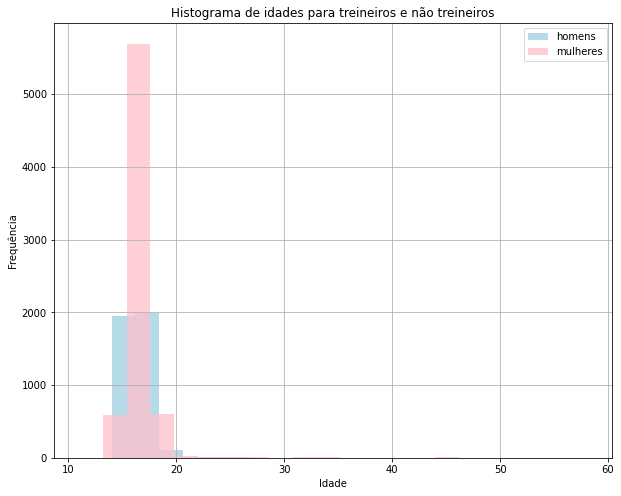

In [ ]:
trein = mulheres.query("IN_TREINEIRO == 1")
h_trein = homens.query("IN_TREINEIRO == 1")
plt.figure(figsize=(10,8))
h_trein['NU_IDADE'].hist(bins=20, alpha=0.90, label='homens', color="lightblue");
trein['NU_IDADE'].hist(bins=20, alpha=0.75, label='mulheres', color="pink");
plt.xlabel('Idade');
plt.ylabel('Frequência');
plt.legend();
plt.title('Histograma de idades para treineiros e não treineiros');

#Total de mulheres inscritas X Cor/Raça

**Aqui podemos visualizar a quantidade de mulheres e sua autodeclaraçao de raça. Mulheres pardas compõe o maior grupo seguido de mulheres que se autodeclaram brancas. O grupo das pessoas que se autodeclaram Pretas compõe o terceiro grupo.**

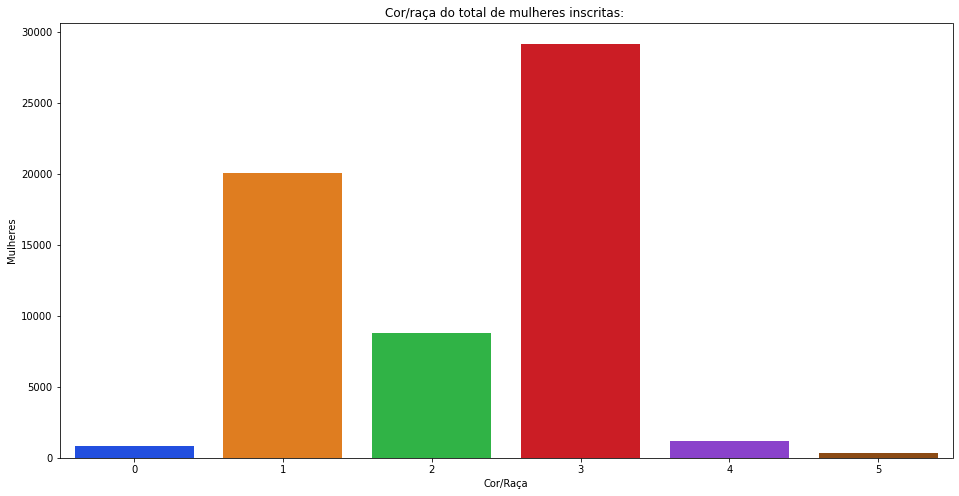

In [ ]:
df1 = mulheres.copy()


ax1 = df1["TP_COR_RACA"].value_counts().index
ay1 = df1["TP_COR_RACA"].value_counts().values

plt.figure(figsize=(16,8))
sns.barplot(x=ax1, y=ay1, data = df1, palette="bright")
plt.xlabel("Cor/Raça")
plt.ylabel("Mulheres")
plt.title("Cor/raça do total de mulheres inscritas: ")

plt.show()


#Estado civil do total das mulheres inscritas:

**Analizando os dados pelo estado civil das concorrentes percebemos que o Maior grupo com destaque é de mulheres solteiras. O que condiz com a idade das participantes.**

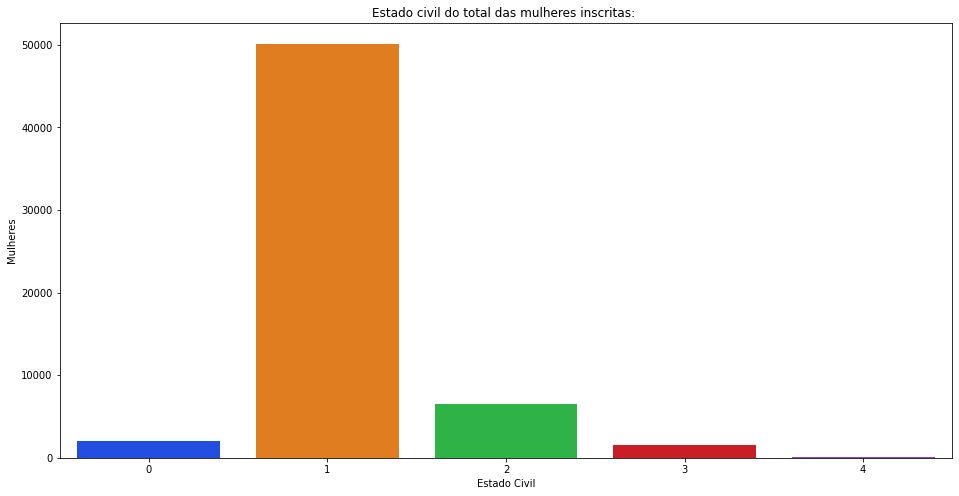

In [ ]:
df6 = mulheres.copy()



ax6 = df6["TP_ESTADO_CIVIL"].value_counts().index
ay6 = df6["TP_ESTADO_CIVIL"].value_counts().values

plt.figure(figsize=(16,8))
sns.barplot(x=ax6, y=ay6, data = df6, palette="bright")
plt.xlabel("Estado Civil")
plt.ylabel("Mulheres")
plt.title("Estado civil do total das mulheres inscritas: ")

plt.show()

#Gravidez e Lactação:

Sabemos que o grupo feminino, por questões biológicas, é o grupo que engravida e por consequência amamenta crianças. Eu quis fazer um levantamento comparativo desses grupos específicos.  

No dicinário de microdados estão descritas as condições de Lactantes e Grávidas. 

In [ ]:
lactante = mulheres['IN_LACTANTE'].value_counts().rename(index = {0:"não-lactante", 1:"lactante"}).sort_index().rename_axis(['IN_LACTANTE']).reset_index(name = 'Total')
lactante

,IN_LACTANTE,Total
0,lactante,85
1,não-lactante,60321


Do total de inscritas, 85 mulheres se declararam lactantes, ou seja, precisam de condições especiais em relação a amamentação para fazer a prova. 

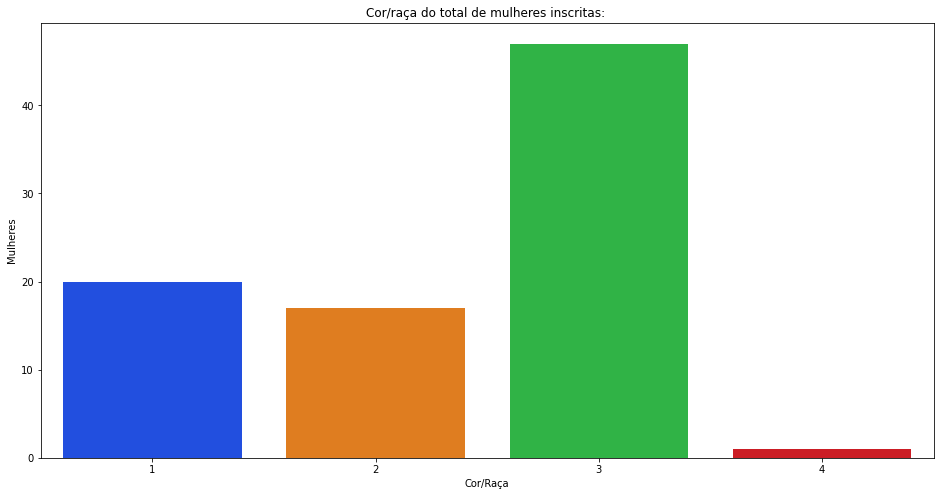

In [ ]:
df2 = mulheres.copy()
lac = df2.query("IN_LACTANTE == 1")


ax2 = lac["TP_COR_RACA"].value_counts().index
ay2 = lac["TP_COR_RACA"].value_counts().values

plt.figure(figsize=(16,8))
sns.barplot(x=ax2, y=ay2, data = lac, palette="bright")
plt.xlabel("Cor/Raça")
plt.ylabel("Mulheres")
plt.title("Cor/raça do total de mulheres inscritas: ")

plt.show()

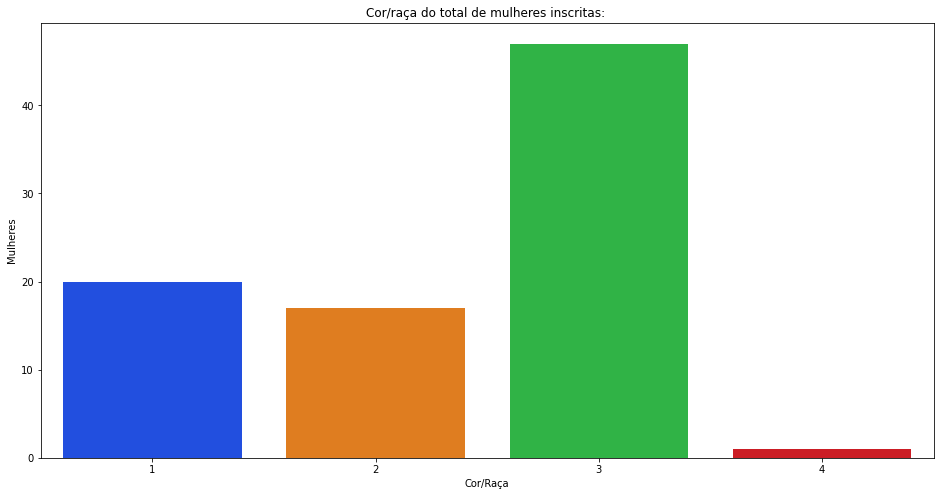

In [ ]:
df3 = mulheres.copy()
grav = df3.query("IN_GESTANTE == 1")


ax3 = lac["TP_COR_RACA"].value_counts().index
ay3 = lac["TP_COR_RACA"].value_counts().values

plt.figure(figsize=(16,8))
sns.barplot(x=ax3, y=ay3, data = grav, palette="bright")
plt.xlabel("Cor/Raça")
plt.ylabel("Mulheres")
plt.title("Cor/raça do total de mulheres inscritas: ")

plt.show()

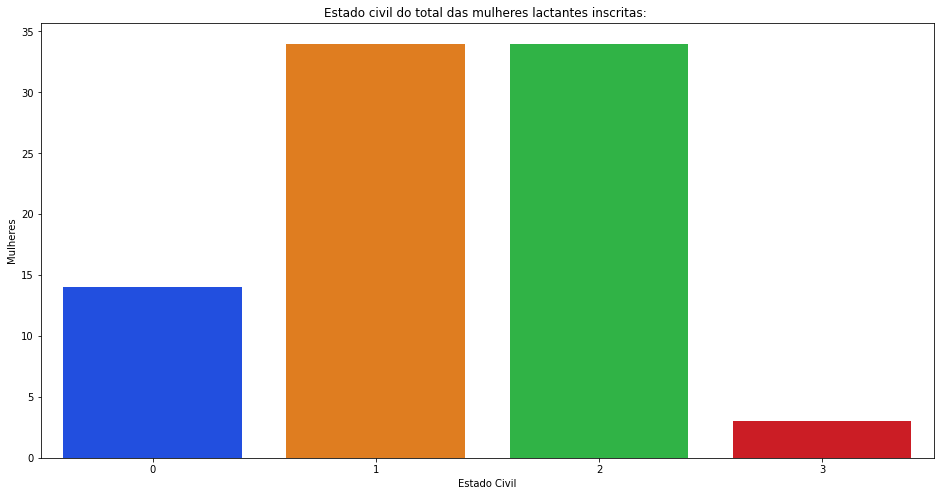

In [ ]:
df4 = mulheres.copy()
lac = df4.query("IN_LACTANTE == 1")


ax4 = lac["TP_ESTADO_CIVIL"].value_counts().index
ay4 = lac["TP_ESTADO_CIVIL"].value_counts().values

plt.figure(figsize=(16,8))
sns.barplot(x=ax4, y=ay4, data = lac, palette="bright")
plt.xlabel("Estado Civil")
plt.ylabel("Mulheres")
plt.title("Estado civil do total das mulheres lactantes inscritas: ")

plt.show()

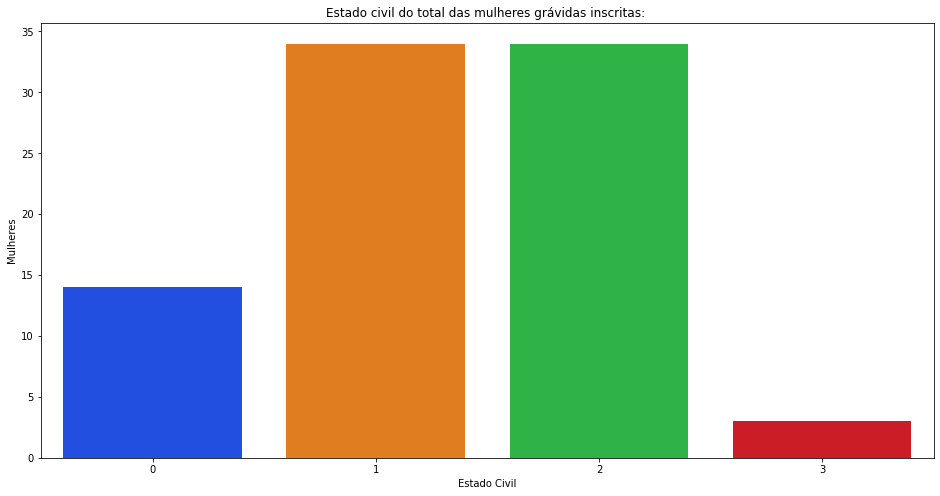

In [ ]:
df5 = mulheres.copy()
grav = df5.query("IN_GESTANTE == 1")


ax5 = lac["TP_ESTADO_CIVIL"].value_counts().index
ay5 = lac["TP_ESTADO_CIVIL"].value_counts().values

plt.figure(figsize=(16,8))
sns.barplot(x=ax5, y=ay5, data = grav, palette="bright")
plt.xlabel("Estado Civil")
plt.ylabel("Mulheres")
plt.title("Estado civil do total das mulheres grávidas inscritas: ")

plt.show()

In [ ]:
nota_mil = mulheres.query('NU_NOTA_REDACAO >= 1000')["TP_SEXO"].value_counts()
nota_mil

F    1
Name: TP_SEXO, dtype: int64

In [ ]:
dados_es[provas].sum()

NU_NOTA_CN         3.546608e+07
NU_NOTA_CH         3.982809e+07
NU_NOTA_MT         3.929468e+07
NU_NOTA_LC         4.056288e+07
NU_NOTA_REDACAO    4.518532e+07
dtype: float64

In [ ]:
dados_es["NU_NOTA_TOTAL"] = dados_es[provas].sum(axis=1)
dados_es["NU_NOTA_TOTAL"]

0         2148.7
1            0.0
2            0.0
3         1959.7
4         2951.9
           ...  
102430    2837.4
102431    2783.7
102432    2869.9
102433    2941.4
102434    2627.2
Name: NU_NOTA_TOTAL, Length: 102435, dtype: float64

Text(0.5, 1.0, 'Aluno nota zero')

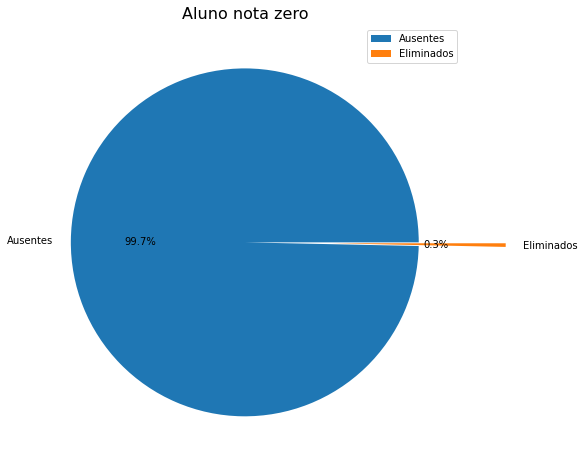

In [ ]:
nota_zero = dados_es.query("NU_NOTA_TOTAL ==0")

#No dicionário dos dados:
    #Codigo de presença = 0 significa que o candidato não compareceu a prova
    #Codigo de presença = 2 significa que ele foi eliminado 
ausente = pd.DataFrame(nota_zero.query("TP_PRESENCA_CN ==0 |TP_PRESENCA_CH ==0 | TP_PRESENCA_LC ==0 | TP_PRESENCA_MT ==0"))
eliminado = (nota_zero.query("TP_PRESENCA_CN == 2 |TP_PRESENCA_CH == 2 | TP_PRESENCA_LC == 2 | TP_PRESENCA_MT ==2"))

ausentes = len(ausente)
eliminados = len(eliminado)


df = pd.DataFrame({'':[ausentes, eliminados]}, index=['Ausentes', 'Eliminados'],)

df.plot.pie(y='', figsize= (8,8), explode = [0., .5],autopct='%1.1f%%')

plt.title("Aluno nota zero" , fontsize = 16)

Text(0.5, 1.0, 'Aluno nota zero')

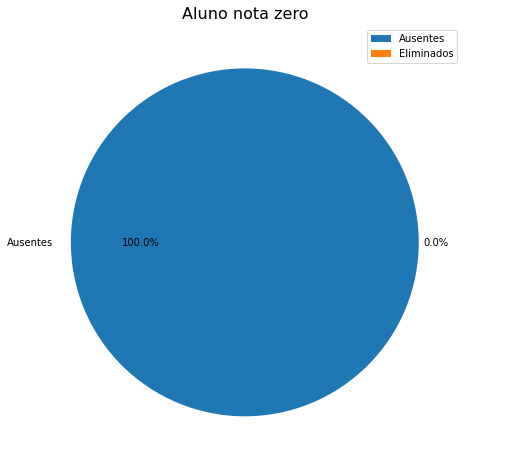

In [ ]:
nota_zero = dados_es.query("NU_NOTA_TOTAL ==0" and ("IN_GESTANTE == 1" or "IN_LACTANTE == 1"))

#No dicionário dos dados:
    #Codigo de presença = 0 significa que o candidato não compareceu a prova
    #Codigo de presença = 2 significa que ele foi eliminado 
ausente = pd.DataFrame(nota_zero.query("TP_PRESENCA_CN ==0 |TP_PRESENCA_CH ==0 | TP_PRESENCA_LC ==0 | TP_PRESENCA_MT ==0"))
eliminado = (nota_zero.query("TP_PRESENCA_CN == 2 |TP_PRESENCA_CH == 2 | TP_PRESENCA_LC == 2 | TP_PRESENCA_MT ==2"))

ausentes = len(ausente)
eliminados = len(eliminado)


df = pd.DataFrame({'':[ausentes, eliminados]}, index=['Ausentes', 'Eliminados'],)

df.plot.pie(y='', figsize= (8,8), explode = [0., .5],autopct='%1.1f%%')

plt.title("Aluno nota zero" , fontsize = 16)

In [ ]:
lactantes = dados_es.query("IN_LACTANTE == 1")
lactantes


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
27,190001312948,2019,3204252,Ponto Belo,32,ES,18,F,1,3,1,3203502.0,Montanha,32.0,ES,2,0,2,1.0,0,31000604.0,3106200.0,Belo Horizonte,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,B,3,A,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,0.0
183,190001512613,2019,3202801,Itapemirim,32,ES,24,F,1,1,1,3202801.0,Itapemirim,32.0,ES,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,C,B,3,D,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,C,A,A,B,0.0
727,190001513163,2019,3205200,Vila Velha,32,ES,25,F,1,4,0,NaN,NaN,NaN,NaN,1,7,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,D,C,B,3,C,A,C,C,A,B,B,B,B,A,B,A,A,B,B,A,C,B,B,B,0.0
1583,190001516273,2019,3205002,Serra,32,ES,22,F,1,1,1,1501402.0,Belém,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,F,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,B,B,B,0.0
2568,190001519606,2019,3205309,Vitória,32,ES,21,F,1,3,1,3205002.0,Serra,32.0,ES,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,F,B,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,D,A,A,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97526,190005506654,2019,3203205,Linhares,32,ES,35,F,2,2,1,3203205.0,Linhares,32.0,ES,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCDC99999EEDBEEADDBAEDEBBDECCDCDEEABCDEDCBABC...,BDACBBEBDCCDABCDCEDDCDEADAAEEEABCDEDCBAABCDED,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,40.0,40.0,100.0,0.0,300.0,B,F,C,B,3,B,A,B,C,B,A,B,A,B,A,B,A,B,B,B,A,C,A,B,A,1929.6
98761,190005509466,2019,3204203,Piúma,32,ES,21,F,1,3,1,3205309.0,Vitória,32.0,ES,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,D,C,B,6,B,A,B,B,A,A,B,B,A,A,A,A,A,B,A,A,B,A,A,A,0.0
98790,190005509495,2019,3203403,Mimoso do Sul,32,ES,33,F,2,2,1,3304557.0,Rio de Janeiro,33.0,RJ,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,E,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,A,B,B,0.0
98845,190005509550,2019,3205309,Vitória,32,ES,31,F,2,2,1,3205309.0,Vitória,32.0,ES,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCAECCEAAAEBECDDAECAAECECCACCCEDAAADBBCE...,AEAEDEBCABECBADABBCCAECDBBCAAAEEECCBDAACBDCAB,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBC

In [34]:
lactantes_nota_zero

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
27,190001312948,2019,3204252,Ponto Belo,32,ES,18,F,1,3,1,3203502.0,Montanha,32.0,ES,2,0,2,1.0,0,31000604.0,3106200.0,Belo Horizonte,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,B,3,A,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,0.0
183,190001512613,2019,3202801,Itapemirim,32,ES,24,F,1,1,1,3202801.0,Itapemirim,32.0,ES,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,E,C,B,3,D,A,B,C,A,A,B,B,A,A,A,A,A,B,A,A,C,A,A,B,0.0
727,190001513163,2019,3205200,Vila Velha,32,ES,25,F,1,4,0,NaN,NaN,NaN,NaN,1,7,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,D,C,B,3,C,A,C,C,A,B,B,B,B,A,B,A,A,B,B,A,C,B,B,B,0.0
1583,190001516273,2019,3205002,Serra,32,ES,22,F,1,1,1,1501402.0,Belém,15.0,PA,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,F,B,5,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,C,B,B,B,0.0
2568,190001519606,2019,3205309,Vitória,32,ES,21,F,1,3,1,3205002.0,Serra,32.0,ES,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,F,B,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,D,A,A,B,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97526,190005506654,2019,3203205,Linhares,32,ES,35,F,2,2,1,3203205.0,Linhares,32.0,ES,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCDC99999EEDBEEADDBAEDEBBDECCDCDEEABCDEDCBABC...,BDACBBEBDCCDABCDCEDDCDEADAAEEEABCDEDCBAABCDED,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,120.0,40.0,40.0,100.0,0.0,300.0,B,F,C,B,3,B,A,B,C,B,A,B,A,B,A,B,A,B,B,B,A,C,A,B,A,1929.6
98761,190005509466,2019,3204203,Piúma,32,ES,21,F,1,3,1,3205309.0,Vitória,32.0,ES,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,D,C,B,6,B,A,B,B,A,A,B,B,A,A,A,A,A,B,A,A,B,A,A,A,0.0
98790,190005509495,2019,3203403,Mimoso do Sul,32,ES,33,F,2,2,1,3304557.0,Rio de Janeiro,33.0,RJ,1,13,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,B,B,B,4,E,A,B,C,A,A,B,A,B,A,B,A,A,B,A,A,C,A,B,B,0.0
98845,190005509550,2019,3205309,Vitória,32,ES,31,F,2,2,1,3205309.0,Vitória,32.0,ES,1,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCAECCEAAAEBECDDAECAAECECCACCCEDAAADBBCE...,AEAEDEBCABECBADABBCCAECDBBCAAAEEECCBDAACBDCAB,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBC

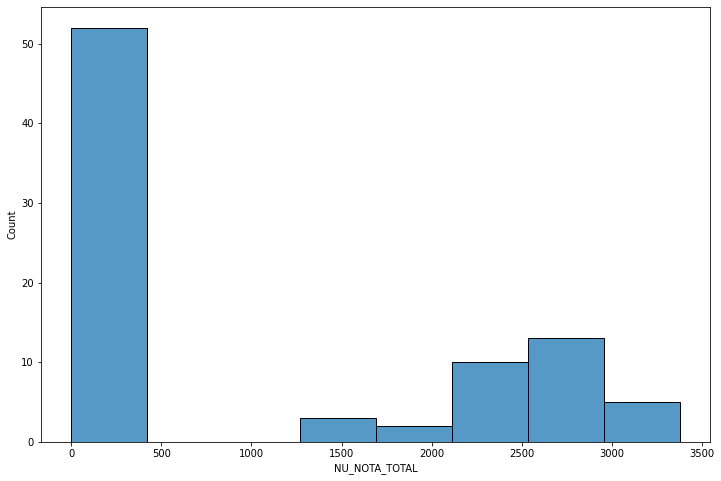

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(lactantes, x="NU_NOTA_TOTAL")

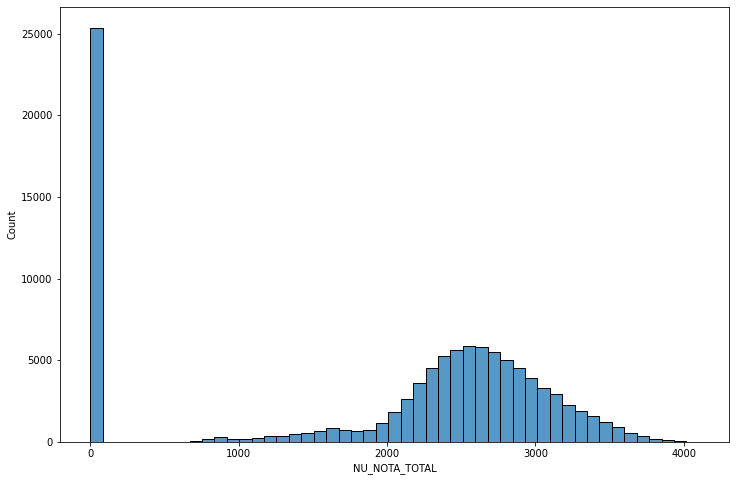

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_es, x="NU_NOTA_TOTAL")

In [ ]:
len(lactantes.query("NU_NOTA_TOTAL == 0"))

52

In [ ]:
(len(lactantes.query("NU_NOTA_TOTAL == 0"))/len(dados_es.query("NU_NOTA_TOTAL == 0")))*100

0.20509584286503119

In [ ]:
(len(lactantes.query("NU_NOTA_TOTAL != 0"))/len(dados_es.query("NU_NOTA_TOTAL != 0")))*100

0.042812106744852814

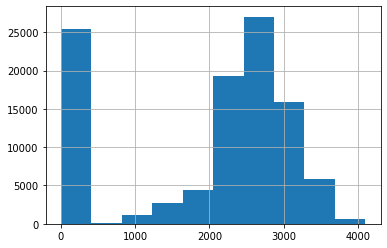

In [ ]:
dados_es["NU_NOTA_TOTAL"].hist()

In [ ]:
gestantes = mulheres['IN_GESTANTE'].value_counts().rename(index = {0:"nao-gestante", 1:"gestante"}).sort_index().rename_axis(['IN_GESTANTE']).reset_index(name = 'Total')
gestantes

,IN_GESTANTE,Total
0,gestante,30
1,nao-gestante,60376


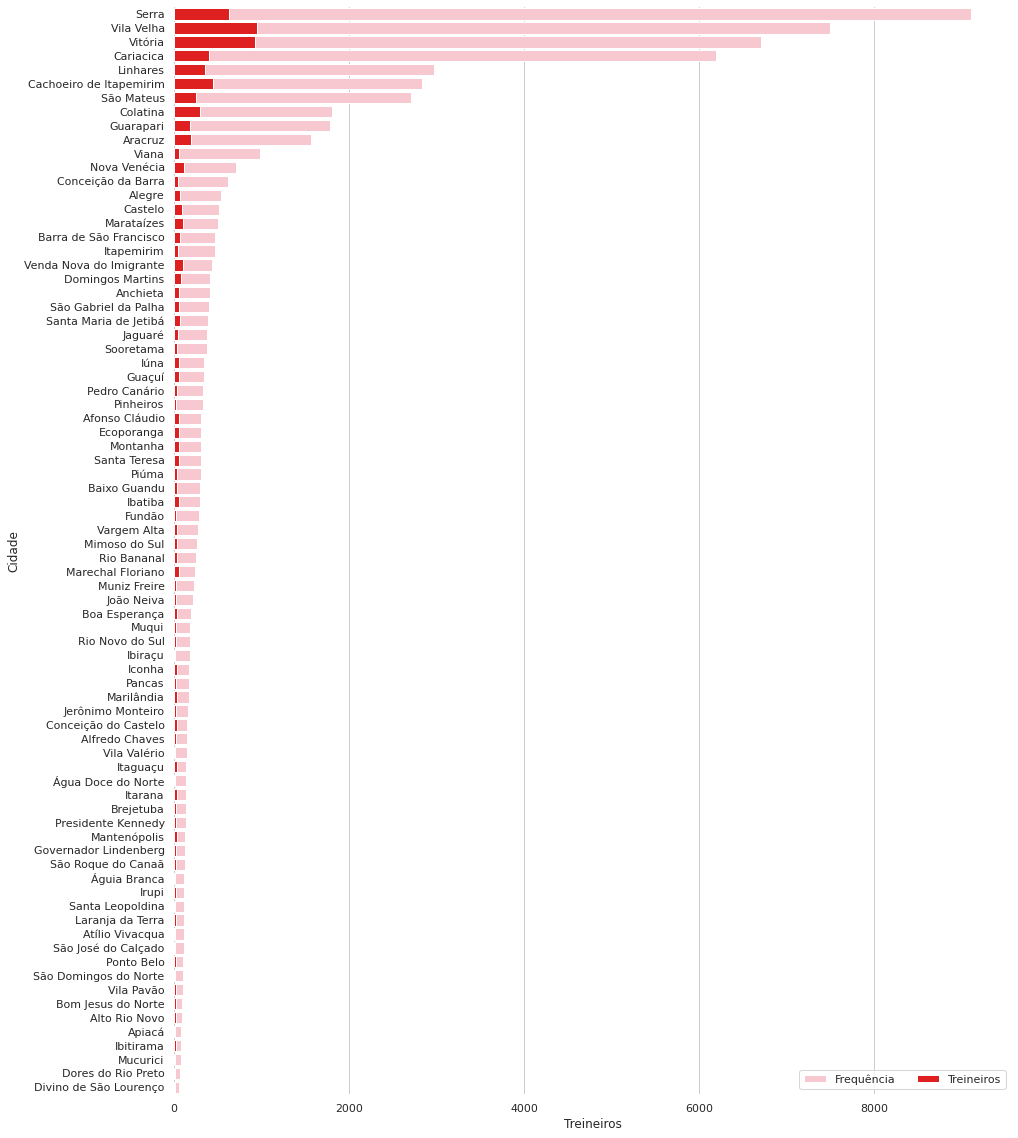

In [ ]:
mun_residencia = mulheres["NO_MUNICIPIO_RESIDENCIA"].value_counts()
treineiros = mulheres.groupby("NO_MUNICIPIO_RESIDENCIA")["IN_TREINEIRO"].sum().to_frame()

candidatos_por_cid = pd.concat(
    [mun_residencia, treineiros],
    axis=1
)
candidatos_por_cid.rename(columns={'NO_MUNICIPIO_RESIDENCIA': 'Frequência', 'IN_TREINEIRO': 'Treineiros'}, inplace=True)
candidatos_por_cid.rename_axis("Cidade", inplace=True)
candidatos_por_cid.reset_index(inplace=True)


sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(15,20
                              
                              ))

sns.set_color_codes("pastel")
sns.barplot(x="Frequência", y="Cidade", data=candidatos_por_cid,
            label="Frequência", color="pink")

sns.set_color_codes("muted")
sns.barplot(x="Treineiros", y="Cidade", data=candidatos_por_cid,
            label="Treineiros", color="red")

ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.show()



